In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
annolexical=  pd.read_parquet("data/anno-lexical-train.parquet")
annolexical["source_party"].unique()

# Incorporate AdFontes - Clean format
df = pd.read_csv("data/ad_fontes_media_sources_ratings.csv")
df["source"] = df["source"].str.replace(" Bias and Reliability", "").str.lower().str.replace(" ", "-")


df["source"].to_list()

# Filter to keep the 'website' versions or sources without duplicates
base_names = df["source"][df['source'].str.contains('website')].str.replace("-website", "").to_list()
base_names_pattern = '|'.join(re.escape(name) for name in base_names) 

# Include if either it isn't in the base names (no multiple media formats) or if there are multiple media, that it is only the website
ad_fontes = df[
    (~ df["source"].str.contains(base_names_pattern)) |  
    ((df['source'].str.contains(base_names_pattern)) & df['source'].str.contains("-website"))] 

ad_fontes.loc[:, "source"] = ad_fontes["source"].str.replace("-website", "")

# Checked which sources didn't match, the only one missing in adfontes is "insider"
name_mapping = {
    "the-advocate-–-baton-rouge": "the-advocate",
    "atlanta-journal-constitution": "atlanta-journalconstitution",
    "chicago-sun-times": "chicago-suntimes",
    "san-diego-union-tribune": "san-diego-uniontribune",
    "pittsburgh-post-gazette": "pittsburgh-postgazette",
    "nj.com": "nj",
    "business-insider": "insider"
}

# annolex[annolex["source_name"] == "insider"] 
# googled the text, refers to the business insider

ad_fontes['source'] = ad_fontes['source'].replace(name_mapping)

ad_fontes.to_csv("data/adfontes_clean", index= False)

C:\Users\sofik\AppData\Local\Temp\ipykernel_18168\1064538025.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_fontes['source'] = ad_fontes['source'].replace(name_mapping)


In [3]:
# Add reliability and bias to annolex
annolex = annolexical.merge(ad_fontes, left_on = 'source_name', right_on= 'source', how= 'left')
unique_sources = annolex.drop_duplicates(subset='source_name')

annolex.to_csv("data/annolexical_adfontes.csv", index=False)

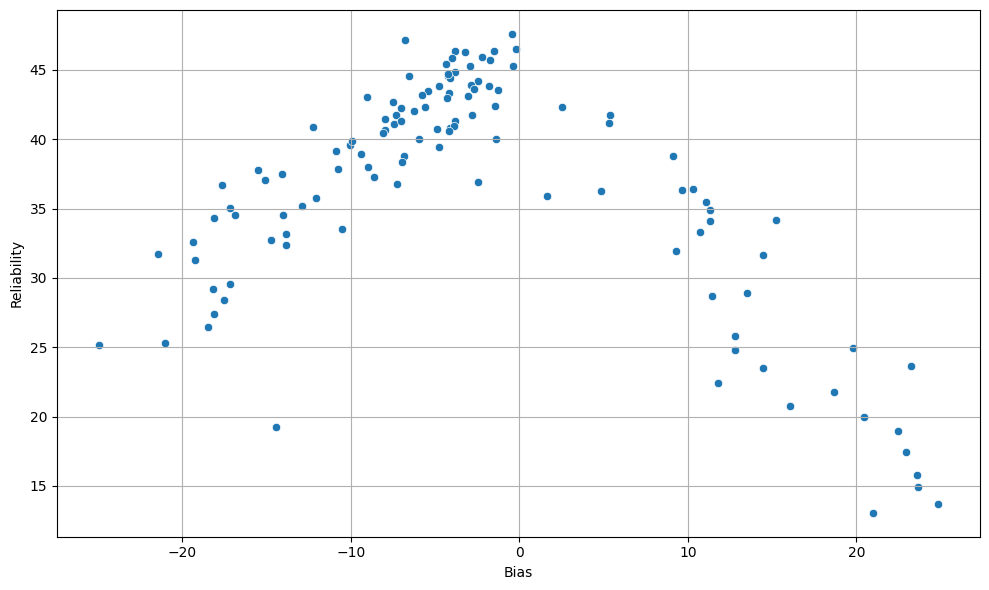

In [6]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=unique_sources, x='bias', y='reliability')

plt.xlabel('Bias')
plt.ylabel('Reliability')

# Show plot
plt.grid()
plt.tight_layout()
plt.show()